In [42]:
import numpy;
import matplotlib.pyplot as plt;

from tensorflow.keras.initializers import TruncatedNormal;

from tqdm import tqdm;

In [43]:
# Training data
feature = numpy.array(
    [
        [0.08, 0.72], [0.26, 0.58], [0.45, 0.15], 
        [0.60, 0.30], [0.10, 1.0], [0.35, 0.95], 
        [0.70, 0.65], [0.92, 0.45]
    ]);

label = numpy.array([1, 1, 1, 1, -1, -1, -1, -1]);

In [44]:
class AdalineLMS:

    # Hyperparameters
    def __init__(self, feature, label):
        
        self.learning_rate = 1e-1;
        self.epoch = 200;

        initializer = TruncatedNormal(mean = 0.5, stddev = 0.02)(shape = (1, 3)).numpy();

        # Weight initial
        self.weight_x1 = initializer[0][0];
        self.weight_x2 = initializer[0][1];

        # Load dataset
        self.feature = feature;
        self.label = label;
    
        print("AdalineLMS initial configuration:");
        print(f"weight x1 {self.weight_x1} - weight x2: {self.weight_x2}");
        print("\n\n\n");

    # Mean Squared Error
    def _mse(self, prediction):
        return numpy.mean((self.label - prediction) ** 2);

    # Feed Forward process
    def forward(self):
        predictions = [];

        for i in self.feature:
            prediction = (self.weight_x1 * i[0]) + (self.weight_x2 * i[1]);

            predictions.append(prediction);

        return predictions;

    # Learning Rule: LMS Implementation
    def learning_rule(self, predictions):

        # new weight x1 = current weight + (learning rate x (ground truth - prediction) x x1
        for i in tqdm(range(len(self.feature))):
            new_weight_x1 = (self.weight_x1 + (self.learning_rate * (self.label[i] - predictions[i]) * self.feature[i][0]));
            new_weight_x2 = (self.weight_x2 + (self.learning_rate * (self.label[i] - predictions[i]) * self.feature[i][1]));

            # print(f"new_weight_x1: {new_weight[0]} - new_weight_x2: {new_weight[1]}")
    
            self.weight_x1 = new_weight_x1;
            self.weight_x2 = new_weight_x2;
    
    def train(self):

        loss_history = [];
        
        # Loop 200 epochs
        for i in range(self.epoch):
            
            print(f"Epoch [{i + 1} / {self.epoch}] -", end = " ");

            loss = 0.0;

            # Forward pass 
            predictions = self.forward();

            # Count current epoch's loss
            loss = self._mse(predictions);

            # Apply LMS to update weight
            self.learning_rule(predictions);
                

            loss_history.append(loss);
            print(f"Epoch {i + 1} - loss: {round(loss, 4)} - weight x1: {self.weight_x1} - weight x2: {self.weight_x2}\n");

         # Plotting MSE curve
        plt.figure(figsize=(10, 6));
        plt.plot(range(self.epoch), loss_history, label='MSE');
        plt.xlabel('Epoch');
        plt.ylabel('Mean Squared Error');
        plt.title('MSE over Epochs');
        plt.legend();
        plt.show()           


AdalineLMS initial configuration:
weight x1 0.5225602388381958 - weight x2: 0.49959665536880493




Epoch [1 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 1 - loss: 1.5468 - weight x1: 0.25674128993868817 - weight x2: 0.10316287987709043

Epoch [2 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 2 - loss: 1.1108 - weight x1: 0.1165571342453968 - weight x2: -0.10801019767618023

Epoch [3 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 3 - loss: 0.9879 - weight x1: 0.042998907340982884 - weight x2: -0.22074654456459483

Epoch [4 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 4 - loss: 0.9532 - weight x1: 0.004739915131194247 - weight x2: -0.2811566701462646

Epoch [5 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 5 - loss: 0.9434 - weight x1: -0.014847553389022841 - weight x2: -0.31373102974870415

Epoch [6 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 6 - loss: 0.9406 - weight x1: -0.024586458330460713 - weight x2: -0.3314790004395402

Epoch [7 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 7 - loss: 0.9398 - weight x1: -0.029155905856320705 - weight x2: -0.3413128951789346

Epoch [8 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 8 - loss: 0.9396 - weight x1: -0.031035093238584985 - weight x2: -0.34690700567661076

Epoch [9 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 9 - loss: 0.9395 - weight x1: -0.031535527530525714 - weight x2: -0.3502158380469999

Epoch [10 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 10 - loss: 0.9395 - weight x1: -0.031349106185869065 - weight x2: -0.3522803533581198

Epoch [11 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7970.17it/s]


Epoch 11 - loss: 0.9395 - weight x1: -0.030839116070340233 - weight x2: -0.3536561235454195

Epoch [12 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 12 - loss: 0.9395 - weight x1: -0.03019472142101877 - weight x2: -0.35464071523056473

Epoch [13 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 13 - loss: 0.9395 - weight x1: -0.02951296547841803 - weight x2: -0.35539445772925715

Epoch [14 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7996.77it/s]


Epoch 14 - loss: 0.9395 - weight x1: -0.028842283725252264 - weight x2: -0.3560045940888592

Epoch [15 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 15 - loss: 0.9395 - weight x1: -0.028205581944561554 - weight x2: -0.3565193656048089

Epoch [16 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 16 - loss: 0.9395 - weight x1: -0.027612465410564446 - weight x2: -0.35696612874230305

Epoch [17 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 17 - loss: 0.9395 - weight x1: -0.027065709477851876 - weight x2: -0.35736099139819044

Epoch [18 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 18 - loss: 0.9395 - weight x1: -0.026564674376066938 - weight x2: -0.3577139443407132

Epoch [19 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 19 - loss: 0.9395 - weight x1: -0.02610709925449286 - weight x2: -0.35803159919767075

Epoch [20 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7928.74it/s]


Epoch 20 - loss: 0.9395 - weight x1: -0.025690037334453276 - weight x2: -0.3583186542870842

Epoch [21 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 21 - loss: 0.9395 - weight x1: -0.0253103365696453 - weight x2: -0.3585786838256772

Epoch [22 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 22 - loss: 0.9395 - weight x1: -0.024964880412747657 - weight x2: -0.3588145668535301

Epoch [23 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 23 - loss: 0.9395 - weight x1: -0.02465070251180841 - weight x2: -0.3590287239458221

Epoch [24 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 24 - loss: 0.9395 - weight x1: -0.024365035658733478 - weight x2: -0.359223251041811

Epoch [25 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 25 - loss: 0.9395 - weight x1: -0.024105326913055856 - weight x2: -0.3593999979010531

Epoch [26 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 26 - loss: 0.9395 - weight x1: -0.02386923575365002 - weight x2: -0.3595606164828926

Epoch [27 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 27 - loss: 0.9395 - weight x1: -0.02365462411737302 - weight x2: -0.35970659274310485

Epoch [28 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 28 - loss: 0.9395 - weight x1: -0.023459542947028067 - weight x2: -0.35983926906885744

Epoch [29 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 29 - loss: 0.9395 - weight x1: -0.02328221762879975 - weight x2: -0.35995986123716234

Epoch [30 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 30 - loss: 0.9395 - weight x1: -0.02312103351541333 - weight x2: -0.3600694720059136

Epoch [31 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8002.49it/s]


Epoch 31 - loss: 0.9395 - weight x1: -0.022974522108758923 - weight x2: -0.36016910249928824

Epoch [32 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7991.05it/s]


Epoch 32 - loss: 0.9395 - weight x1: -0.022841348150755905 - weight x2: -0.3602596620424437

Epoch [33 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 33 - loss: 0.9395 - weight x1: -0.022720297703756713 - weight x2: -0.36034197682783664

Epoch [34 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 34 - loss: 0.9395 - weight x1: -0.022610267217483777 - weight x2: -0.3604167976475861

Epoch [35 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 35 - loss: 0.9395 - weight x1: -0.02251025353892793 - weight x2: -0.36048480684490714

Epoch [36 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 36 - loss: 0.9395 - weight x1: -0.022419344803918037 - weight x2: -0.3605466245918178

Epoch [37 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 37 - loss: 0.9395 - weight x1: -0.022336712143135096 - weight x2: -0.36060281457362875

Epoch [38 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7998.67it/s]


Epoch 38 - loss: 0.9395 - weight x1: -0.022261602135349917 - weight x2: -0.36065388914440244

Epoch [39 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 39 - loss: 0.9395 - weight x1: -0.022193329943536046 - weight x2: -0.3607003140069503

Epoch [40 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8013.96it/s]


Epoch 40 - loss: 0.9395 - weight x1: -0.022131273073642543 - weight x2: -0.3607425124635243

Epoch [41 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 41 - loss: 0.9395 - weight x1: -0.02207486570037808 - weight x2: -0.36078086927780995

Epoch [42 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 42 - loss: 0.9395 - weight x1: -0.022023593508938184 - weight x2: -0.3608157341844165

Epoch [43 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8004.40it/s]


Epoch 43 - loss: 0.9395 - weight x1: -0.021976989005996976 - weight x2: -0.36084742507838585

Epoch [44 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 44 - loss: 0.9395 - weight x1: -0.02193462725739887 - weight x2: -0.3608762309140777

Epoch [45 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 45 - loss: 0.9395 - weight x1: -0.021896122013786073 - weight x2: -0.3609024143400106

Epoch [46 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8017.79it/s]


Epoch 46 - loss: 0.9395 - weight x1: -0.02186112218889013 - weight x2: -0.3609262140937609

Epoch [47 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 47 - loss: 0.9395 - weight x1: -0.02182930865840367 - weight x2: -0.3609478471787978

Epoch [48 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7987.25it/s]


Epoch 48 - loss: 0.9395 - weight x1: -0.021800391350261412 - weight x2: -0.36096751084312373

Epoch [49 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 49 - loss: 0.9395 - weight x1: -0.021774106599806803 - weight x2: -0.36098538437777394

Epoch [50 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7981.55it/s]


Epoch 50 - loss: 0.9395 - weight x1: -0.021750214745733458 - weight x2: -0.3610016307515794

Epoch [51 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 51 - loss: 0.9395 - weight x1: -0.02172849794488415 - weight x2: -0.36101639809710223

Epoch [52 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 52 - loss: 0.9395 - weight x1: -0.021708758185983466 - weight x2: -0.36102982106129305

Epoch [53 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 53 - loss: 0.9395 - weight x1: -0.021690815484194846 - weight x2: -0.36104202203318764

Epoch [54 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 5306.73it/s]


Epoch 54 - loss: 0.9395 - weight x1: -0.021674506240040026 - weight x2: -0.36105311225983683

Epoch [55 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 3992.67it/s]


Epoch 55 - loss: 0.9395 - weight x1: -0.021659681747718255 - weight x2: -0.3610631928606445

Epoch [56 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7989.15it/s]


Epoch 56 - loss: 0.9395 - weight x1: -0.02164620683922401 - weight x2: -0.3610723557493625

Epoch [57 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 57 - loss: 0.9395 - weight x1: -0.021633958651900834 - weight x2: -0.3610806844721501

Epoch [58 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 58 - loss: 0.9395 - weight x1: -0.021622825508193937 - weight x2: -0.361088254969338

Epoch [59 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 59 - loss: 0.9395 - weight x1: -0.02161270589738734 - weight x2: -0.3610951362678438

Epoch [60 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 60 - loss: 0.9395 - weight x1: -0.021603507550040507 - weight x2: -0.36110139111055095

Epoch [61 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7911.92it/s]


Epoch 61 - loss: 0.9395 - weight x1: -0.021595146596686723 - weight x2: -0.36110707652839147

Epoch [62 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 62 - loss: 0.9395 - weight x1: -0.021587546803120812 - weight x2: -0.3611122443603475

Epoch [63 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7991.05it/s]


Epoch 63 - loss: 0.9395 - weight x1: -0.021580638875304287 - weight x2: -0.36111694172611286

Epoch [64 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 64 - loss: 0.9395 - weight x1: -0.021574359827550647 - weight x2: -0.36112121145572496

Epoch [65 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 65 - loss: 0.9395 - weight x1: -0.02156865240822905 - weight x2: -0.3611250924800845

Epoch [66 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 66 - loss: 0.9395 - weight x1: -0.02156346457775043 - weight x2: -0.36112862018592234

Epoch [67 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 67 - loss: 0.9395 - weight x1: -0.02155874903407684 - weight x2: -0.36113182673845234

Epoch [68 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 68 - loss: 0.9395 - weight x1: -0.021554462781426663 - weight x2: -0.3611347413746494

Epoch [69 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 69 - loss: 0.9395 - weight x1: -0.021550566738244223 - weight x2: -0.36113739066982903

Epoch [70 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 5299.18it/s]


Epoch 70 - loss: 0.9395 - weight x1: -0.021547025380858523 - weight x2: -0.3611397987799582

Epoch [71 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8002.49it/s]


Epoch 71 - loss: 0.9395 - weight x1: -0.021543806419582708 - weight x2: -0.3611419876619063

Epoch [72 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 72 - loss: 0.9395 - weight x1: -0.021540880504300364 - weight x2: -0.3611439772736458

Epoch [73 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7941.88it/s]


Epoch 73 - loss: 0.9395 - weight x1: -0.02153822095685444 - weight x2: -0.36114578575622636

Epoch [74 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 74 - loss: 0.9395 - weight x1: -0.021535803527799054 - weight x2: -0.36114742959918283

Epoch [75 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 75 - loss: 0.9395 - weight x1: -0.02153360617529585 - weight x2: -0.36114892379088503

Epoch [76 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 76 - loss: 0.9395 - weight x1: -0.02153160886413894 - weight x2: -0.36115028195520005

Epoch [77 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 77 - loss: 0.9395 - weight x1: -0.021529793383076277 - weight x2: -0.36115151647571303

Epoch [78 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 78 - loss: 0.9395 - weight x1: -0.02152814317876163 - weight x2: -0.361152638608639

Epoch [79 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 79 - loss: 0.9395 - weight x1: -0.02152664320482294 - weight x2: -0.3611536585854563

Epoch [80 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 80 - loss: 0.9395 - weight x1: -0.02152527978467142 - weight x2: -0.36115458570619535

Epoch [81 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7983.45it/s]


Epoch 81 - loss: 0.9395 - weight x1: -0.021524040486799963 - weight x2: -0.3611554284242361

Epoch [82 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 82 - loss: 0.9395 - weight x1: -0.02152291401143383 - weight x2: -0.36115619442338387

Epoch [83 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 83 - loss: 0.9395 - weight x1: -0.021521890087501078 - weight x2: -0.36115689068793033

Epoch [84 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 84 - loss: 0.9395 - weight x1: -0.021520959378981713 - weight x2: -0.361157523566335

Epoch [85 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7977.75it/s]


Epoch 85 - loss: 0.9395 - weight x1: -0.0215201133997832 - weight x2: -0.36115809882911004

Epoch [86 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 86 - loss: 0.9395 - weight x1: -0.02151934443636505 - weight x2: -0.36115862172143476

Epoch [87 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 87 - loss: 0.9395 - weight x1: -0.021518645477407818 - weight x2: -0.3611590970109809

Epoch [88 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8015.87it/s]


Epoch 88 - loss: 0.9395 - weight x1: -0.021518010149884616 - weight x2: -0.36115952903138365

Epoch [89 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 89 - loss: 0.9395 - weight x1: -0.02151743266095254 - weight x2: -0.361159921721755

Epoch [90 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 90 - loss: 0.9395 - weight x1: -0.02151690774513438 - weight x2: -0.36116027866260036

Epoch [91 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 91 - loss: 0.9395 - weight x1: -0.021516430616308438 - weight x2: -0.3611606031084649

Epoch [92 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 92 - loss: 0.9395 - weight x1: -0.021515996924069233 - weight x2: -0.36116089801760853

Epoch [93 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 93 - loss: 0.9395 - weight x1: -0.021515602714061215 - weight x2: -0.3611611660789788

Epoch [94 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 94 - loss: 0.9395 - weight x1: -0.021515244391923073 - weight x2: -0.3611614097367282

Epoch [95 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 95 - loss: 0.9395 - weight x1: -0.02151491869051498 - weight x2: -0.3611616312124999

Epoch [96 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 96 - loss: 0.9395 - weight x1: -0.02151462264012924 - weight x2: -0.36116183252568435

Epoch [97 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 97 - loss: 0.9395 - weight x1: -0.021514353541412637 - weight x2: -0.36116201551183186

Epoch [98 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 98 - loss: 0.9395 - weight x1: -0.021514108940754284 - weight x2: -0.36116218183938903

Epoch [99 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 99 - loss: 0.9395 - weight x1: -0.021513886607913653 - weight x2: -0.3611623330249113

Epoch [100 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 100 - loss: 0.9395 - weight x1: -0.02151368451568561 - weight x2: -0.3611624704468906

Epoch [101 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 101 - loss: 0.9395 - weight x1: -0.021513500821416613 - weight x2: -0.3611625953583247

Epoch [102 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 102 - loss: 0.9395 - weight x1: -0.02151333385020357 - weight x2: -0.3611627088981416

Epoch [103 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 103 - loss: 0.9395 - weight x1: -0.02151318207962233 - weight x2: -0.3611628121015843

Epoch [104 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 104 - loss: 0.9395 - weight x1: -0.021513044125846204 - weight x2: -0.36116290590964983

Epoch [105 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 105 - loss: 0.9395 - weight x1: -0.021512918731028688 - weight x2: -0.3611629911776692

Epoch [106 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 106 - loss: 0.9395 - weight x1: -0.021512804751834314 - weight x2: -0.3611630686831064

Epoch [107 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 107 - loss: 0.9395 - weight x1: -0.02151270114901399 - weight x2: -0.361163139132647

Epoch [108 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 108 - loss: 0.9395 - weight x1: -0.021512606977929172 - weight x2: -0.3611632031686418

Epoch [109 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 109 - loss: 0.9395 - weight x1: -0.02151252137993885 - weight x2: -0.36116326137496363

Epoch [110 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 110 - loss: 0.9395 - weight x1: -0.02151244357457044 - weight x2: -0.36116331428233095

Epoch [111 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 111 - loss: 0.9395 - weight x1: -0.021512372852403545 - weight x2: -0.36116336237314695

Epoch [112 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 112 - loss: 0.9395 - weight x1: -0.02151230856860164 - weight x2: -0.36116340608589814

Epoch [113 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 113 - loss: 0.9395 - weight x1: -0.02151225013703252 - weight x2: -0.3611634458191525

Epoch [114 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 114 - loss: 0.9395 - weight x1: -0.021512197024923824 - weight x2: -0.36116348193519304

Epoch [115 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 115 - loss: 0.9395 - weight x1: -0.021512148748005513 - weight x2: -0.3611635147633217

Epoch [116 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 116 - loss: 0.9395 - weight x1: -0.021512104866094284 - weight x2: -0.36116354460286154

Epoch [117 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 117 - loss: 0.9395 - weight x1: -0.021512064979079905 - weight x2: -0.3611635717258861

Epoch [118 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 118 - loss: 0.9395 - weight x1: -0.02151202872327719 - weight x2: -0.3611635963796999

Epoch [119 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 119 - loss: 0.9395 - weight x1: -0.021511995768109943 - weight x2: -0.3611636187890936

Epoch [120 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8015.87it/s]


Epoch 120 - loss: 0.9395 - weight x1: -0.021511965813096764 - weight x2: -0.36116363915839356

Epoch [121 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7127.11it/s]


Epoch 121 - loss: 0.9395 - weight x1: -0.021511938585111315 - weight x2: -0.3611636576733246

Epoch [122 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 122 - loss: 0.9395 - weight x1: -0.021511913835891898 - weight x2: -0.36116367450270365

Epoch [123 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 123 - loss: 0.9395 - weight x1: -0.021511891339778086 - weight x2: -0.36116368979997915

Epoch [124 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 124 - loss: 0.9395 - weight x1: -0.0215118708916529 - weight x2: -0.36116370370462986

Epoch [125 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 125 - loss: 0.9395 - weight x1: -0.02151185230507268 - weight x2: -0.36116371634343675

Epoch [126 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 126 - loss: 0.9395 - weight x1: -0.0215118354105671 - weight x2: -0.361163727831639

Epoch [127 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8015.87it/s]


Epoch 127 - loss: 0.9395 - weight x1: -0.021511820054094057 - weight x2: -0.3611637382739848

Epoch [128 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 128 - loss: 0.9395 - weight x1: -0.021511806095635008 - weight x2: -0.36116374776568616

Epoch [129 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 129 - loss: 0.9395 - weight x1: -0.021511793407918332 - weight x2: -0.3611637563932873

Epoch [130 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 130 - loss: 0.9395 - weight x1: -0.021511781875258915 - weight x2: -0.3611637642354537

Epoch [131 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 131 - loss: 0.9395 - weight x1: -0.0215117713925033 - weight x2: -0.3611637713636894

Epoch [132 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 132 - loss: 0.9395 - weight x1: -0.021511761864070902 - weight x2: -0.3611637778429887

Epoch [133 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 133 - loss: 0.9395 - weight x1: -0.02151175320308254 - weight x2: -0.36116378373242924

Epoch [134 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 134 - loss: 0.9395 - weight x1: -0.021511745330568446 - weight x2: -0.36116378908571006

Epoch [135 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 135 - loss: 0.9395 - weight x1: -0.02151173817474787 - weight x2: -0.36116379395164205

Epoch [136 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 136 - loss: 0.9395 - weight x1: -0.021511731670374852 - weight x2: -0.36116379837459206

Epoch [137 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7989.15it/s]


Epoch 137 - loss: 0.9395 - weight x1: -0.021511725758143287 - weight x2: -0.361163802394888

Epoch [138 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 138 - loss: 0.9395 - weight x1: -0.021511720384146192 - weight x2: -0.3611638060491864

Epoch [139 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 139 - loss: 0.9395 - weight x1: -0.021511715499384035 - weight x2: -0.3611638093708069

Epoch [140 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7989.15it/s]


Epoch 140 - loss: 0.9395 - weight x1: -0.021511711059318157 - weight x2: -0.36116381239003564

Epoch [141 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8035.07it/s]


Epoch 141 - loss: 0.9395 - weight x1: -0.02151170702346445 - weight x2: -0.36116381513440143

Epoch [142 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 142 - loss: 0.9395 - weight x1: -0.02151170335502453 - weight x2: -0.3611638176289272

Epoch [143 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 143 - loss: 0.9395 - weight x1: -0.021511700020550015 - weight x2: -0.3611638198963578

Epoch [144 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 144 - loss: 0.9395 - weight x1: -0.021511696989637466 - weight x2: -0.36116382195736724

Epoch [145 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 145 - loss: 0.9395 - weight x1: -0.021511694234651463 - weight x2: -0.3611638238307477

Epoch [146 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 146 - loss: 0.9395 - weight x1: -0.021511691730472376 - weight x2: -0.3611638255335804

Epoch [147 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 147 - loss: 0.9395 - weight x1: -0.021511689454267333 - weight x2: -0.36116382708139144

Epoch [148 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 148 - loss: 0.9395 - weight x1: -0.021511687385282127 - weight x2: -0.36116382848829387

Epoch [149 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 149 - loss: 0.9395 - weight x1: -0.021511685504652066 - weight x2: -0.36116382976711553

Epoch [150 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 150 - loss: 0.9395 - weight x1: -0.02151168379522976 - weight x2: -0.3611638309295165

Epoch [151 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7998.67it/s]


Epoch 151 - loss: 0.9395 - weight x1: -0.02151168224142884 - weight x2: -0.3611638319860954

Epoch [152 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8027.38it/s]


Epoch 152 - loss: 0.9395 - weight x1: -0.021511680829081996 - weight x2: -0.36116383294648613

Epoch [153 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 153 - loss: 0.9395 - weight x1: -0.021511679545311607 - weight x2: -0.3611638338194452

Epoch [154 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 154 - loss: 0.9395 - weight x1: -0.021511678378412384 - weight x2: -0.3611638346129325

Epoch [155 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 155 - loss: 0.9395 - weight x1: -0.021511677317744678 - weight x2: -0.3611638353341826

Epoch [156 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 156 - loss: 0.9395 - weight x1: -0.021511676353637453 - weight x2: -0.361163835989772

Epoch [157 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 157 - loss: 0.9395 - weight x1: -0.021511675477300082 - weight x2: -0.36116383658567824

Epoch [158 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 158 - loss: 0.9395 - weight x1: -0.021511674680742242 - weight x2: -0.36116383712733474

Epoch [159 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 159 - loss: 0.9395 - weight x1: -0.021511673956700963 - weight x2: -0.3611638376196802

Epoch [160 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 160 - loss: 0.9395 - weight x1: -0.021511673298574507 - weight x2: -0.36116383806720376

Epoch [161 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 161 - loss: 0.9395 - weight x1: -0.021511672700362257 - weight x2: -0.3611638384739859

Epoch [162 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 162 - loss: 0.9395 - weight x1: -0.0215116721566097 - weight x2: -0.3611638388437356

Epoch [163 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 163 - loss: 0.9395 - weight x1: -0.02151167166235901 - weight x2: -0.3611638391798243

Epoch [164 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 164 - loss: 0.9395 - weight x1: -0.021511671213103656 - weight x2: -0.36116383948531633

Epoch [165 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 3997.91it/s]


Epoch 165 - loss: 0.9395 - weight x1: -0.021511670804747342 - weight x2: -0.3611638397629971

Epoch [166 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 166 - loss: 0.9395 - weight x1: -0.021511670433566728 - weight x2: -0.3611638400153986

Epoch [167 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 167 - loss: 0.9395 - weight x1: -0.021511670096177424 - weight x2: -0.36116384024482207

Epoch [168 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 168 - loss: 0.9395 - weight x1: -0.02151166978950321 - weight x2: -0.3611638404533594

Epoch [169 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 169 - loss: 0.9395 - weight x1: -0.021511669510747837 - weight x2: -0.3611638406429121

Epoch [170 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 170 - loss: 0.9395 - weight x1: -0.021511669257369616 - weight x2: -0.3611638408152083

Epoch [171 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 171 - loss: 0.9395 - weight x1: -0.021511669027058297 - weight x2: -0.3611638409718191

Epoch [172 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 172 - loss: 0.9395 - weight x1: -0.021511668817713957 - weight x2: -0.3611638411141726

Epoch [173 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8000.58it/s]


Epoch 173 - loss: 0.9395 - weight x1: -0.02151166862742774 - weight x2: -0.36116384124356654

Epoch [174 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 174 - loss: 0.9395 - weight x1: -0.02151166845446472 - weight x2: -0.3611638413611808

Epoch [175 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 175 - loss: 0.9395 - weight x1: -0.021511668297247828 - weight x2: -0.3611638414680877

Epoch [176 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 176 - loss: 0.9395 - weight x1: -0.021511668154343556 - weight x2: -0.3611638415652621

Epoch [177 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 2658.41it/s]


Epoch 177 - loss: 0.9395 - weight x1: -0.021511668024448913 - weight x2: -0.36116384165358995

Epoch [178 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 178 - loss: 0.9395 - weight x1: -0.021511667906379546 - weight x2: -0.36116384173387667

Epoch [179 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 179 - loss: 0.9395 - weight x1: -0.02151166779905893 - weight x2: -0.36116384180685435

Epoch [180 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 180 - loss: 0.9395 - weight x1: -0.02151166770150846 - weight x2: -0.3611638418731883

Epoch [181 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 181 - loss: 0.9395 - weight x1: -0.0215116676128388 - weight x2: -0.36116384193348333

Epoch [182 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 182 - loss: 0.9395 - weight x1: -0.02151166753224138 - weight x2: -0.3611638419882893

Epoch [183 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7979.65it/s]


Epoch 183 - loss: 0.9395 - weight x1: -0.02151166745898135 - weight x2: -0.3611638420381059

Epoch [184 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 2273.03it/s]


Epoch 184 - loss: 0.9395 - weight x1: -0.021511667392390674 - weight x2: -0.3611638420833873

Epoch [185 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 185 - loss: 0.9395 - weight x1: -0.021511667331862286 - weight x2: -0.3611638421245464

Epoch [186 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7964.50it/s]

Epoch 186 - loss: 0.9395 - weight x1: -0.021511667276844205 - weight x2: -0.36116384216195846

Epoch [187 / 200] - 


100%|██████████| 8/8 [00:00<00:00, 8000.58it/s]


Epoch 187 - loss: 0.9395 - weight x1: -0.02151166722683484 - weight x2: -0.3611638421959647

Epoch [188 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 188 - loss: 0.9395 - weight x1: -0.02151166718137818 - weight x2: -0.361163842226875

Epoch [189 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 189 - loss: 0.9395 - weight x1: -0.021511667140059802 - weight x2: -0.36116384225497133

Epoch [190 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 190 - loss: 0.9395 - weight x1: -0.021511667102502977 - weight x2: -0.36116384228050985

Epoch [191 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 191 - loss: 0.9395 - weight x1: -0.021511667068365187 - weight x2: -0.36116384230372345

Epoch [192 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7994.86it/s]


Epoch 192 - loss: 0.9395 - weight x1: -0.021511667037335244 - weight x2: -0.36116384232482374

Epoch [193 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 193 - loss: 0.9395 - weight x1: -0.02151166700913016 - weight x2: -0.36116384234400306

Epoch [194 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7996.77it/s]


Epoch 194 - loss: 0.9395 - weight x1: -0.021511666983492772 - weight x2: -0.3611638423614363

Epoch [195 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 2657.57it/s]


Epoch 195 - loss: 0.9395 - weight x1: -0.021511666960189385 - weight x2: -0.3611638423772825

Epoch [196 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 196 - loss: 0.9395 - weight x1: -0.021511666939007468 - weight x2: -0.36116384239168614

Epoch [197 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 197 - loss: 0.9395 - weight x1: -0.021511666919753925 - weight x2: -0.3611638424047785

Epoch [198 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7991.05it/s]


Epoch 198 - loss: 0.9395 - weight x1: -0.021511666902253174 - weight x2: -0.361163842416679

Epoch [199 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 199 - loss: 0.9395 - weight x1: -0.02151166688634567 - weight x2: -0.36116384242749605

Epoch [200 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 200 - loss: 0.9395 - weight x1: -0.021511666871886312 - weight x2: -0.36116384243732835



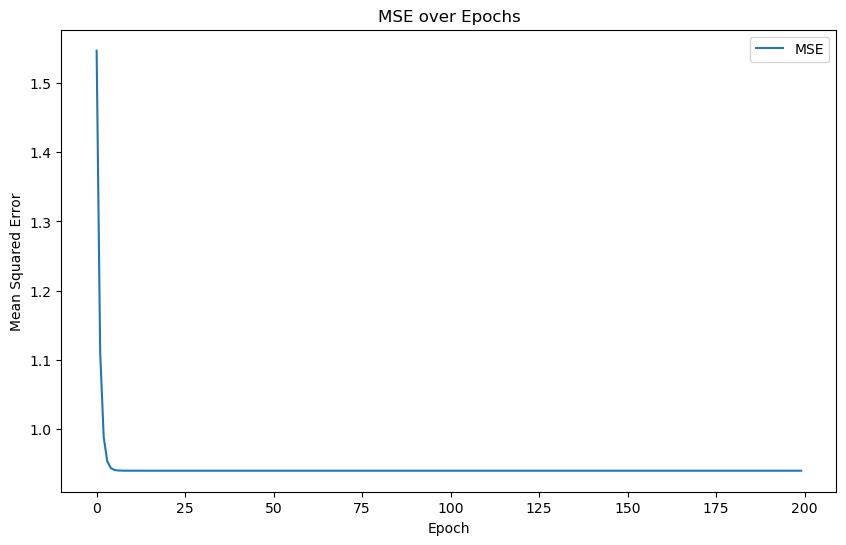

In [45]:
model = AdalineLMS(feature, label);
model.train();

In [ ]:
weights = numpy.array([model.weight_x1, model.weight_x2]);

# Plotting decision boundary
def plot_decision_boundary(X, y, weights):
    min_x1, max_x1 = X[:, 0].min() - 1, X[:, 0].max() + 1;
    min_x2, max_x2 = X[:, 1].min() - 1, X[:, 1].max() + 1;
    x1, x2 = numpy.meshgrid(numpy.linspace(min_x1, max_x1, 200), numpy.linspace(min_x2, max_x2, 200));
    Z = net_input(numpy.c_[np.ones(x1.ravel().shape), x1.ravel(), x2.ravel()], weights).reshape(x1.shape)
    plt.contourf(x1, x2, Z, levels=[-float('inf'), 0, float('inf')], alpha=0.3, colors=['red', 'blue'])
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolor='k', cmap=plt.cm.Paired)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

plot_decision_boundary(X, y, weights)

# Final weights
print("Final weights (including bias):", weights)

: 